# DATASET 4 - Repetição em todos os pontos - EXERCICIO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

## Entrada de dados

In [2]:
df = pd.DataFrame({
    "Ensaio": ["Ensaio 1", "Ensaio 2", "Ensaio 3", "Ensaio 4", "Ensaio 5", "Ensaio 6", "Ensaio 7", "Ensaio 8", "Ensaio 9", "Ensaio 10",
              "Ensaio 11", "Ensaio 12", "Ensaio 13", "Ensaio 14", "Ensaio 15", ],
    "Ordem de coleta": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "Concentração": [1, 1, 1, 3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
    "Sinal": [0.085, 0.099, 0.11, 0.125, 0.138, 0.142, 0.205, 0.264, 0.218, 0.269, 0.291, 0.295, 0.368, 0.349, 0.351]    
})

dataset_name = "Dataset 3"
alfa = 0.05

### Plotando o gráfico com os dados

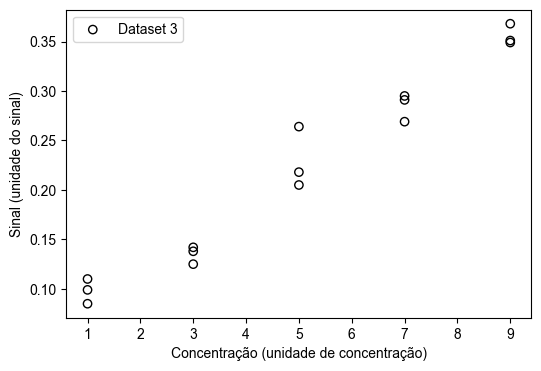

In [3]:
plt.figure(figsize=(6,4))
plt.scatter(df['Concentração'], df['Sinal'], label=dataset_name, edgecolors='k', facecolor='None')
plt.xlabel("Concentração (unidade de concentração)")
plt.ylabel("Sinal (unidade do sinal)")
plt.legend()
plt.show()

## Regressão linear com SciPy

$$ Sinal = b_0 + b_1 \times Concentracao $$

In [4]:
reg_linear = stats.linregress(df["Concentração"], df["Sinal"])
b1 = reg_linear[0]
b1

0.0333

In [5]:
b0 = reg_linear[1]
b0

0.054099999999999954

## Predição valores pontuais

In [6]:
df["ypred"] = b1*df['Concentração'] + b0
df = df.sort_values(by=["Concentração"])

## Plotando o gráfico de regressão

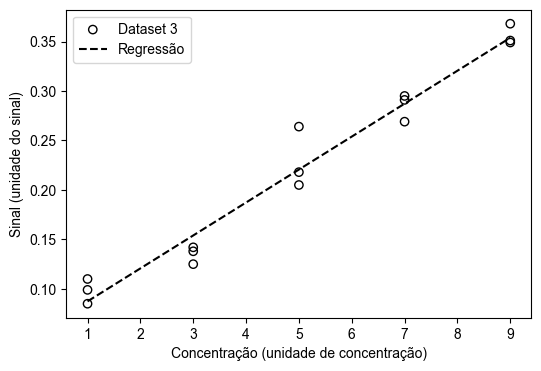

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(df['Concentração'], df['Sinal'], label=dataset_name, edgecolors='k', facecolor='None')
plt.plot(df['Concentração'], df['ypred'], label="Regressão", c='k', ls='--')
plt.xlabel("Concentração (unidade de concentração)")
plt.ylabel("Sinal (unidade do sinal)")
plt.legend()
plt.show()

## ANOVA

#### Somatório dos quadrados TOTAIS

In [8]:
df['sqt'] = np.square(df["Sinal"] - df["Sinal"].mean())
df

,Ensaio,Ordem de coleta,Concentração,Sinal,ypred,sqt
0,Ensaio 1,1,1,0.085,0.0874,0.018387
1,Ensaio 2,2,1,0.099,0.0874,0.014787
2,Ensaio 3,3,1,0.110,0.0874,0.012232
3,Ensaio 4,4,3,0.125,0.1540,0.009139
4,Ensaio 5,5,3,0.138,0.1540,0.006823
5,Ensaio 6,6,3,0.142,0.1540,0.006178
6,Ensaio 7,7,5,0.205,0.2206,0.000243
7,Ensaio 8,8,5,0.264,0.2206,0.001884
8,Ensaio 9,9,5,0.218,0.2206,0.000007
9,Ensaio 10,10,7,0.269,0.2872,0.002343


In [9]:
SQT = df['sqt'].sum()
SQT

0.13773159999999995

In [10]:
gl_total = df.shape[0] - 1
gl_total

14

In [11]:
MSQT = SQT/gl_total
MSQT

0.009837971428571426

### Somatório dos quadrados da REGRESSÃO

In [12]:
df['sqr'] = np.square(df["ypred"] - df["Sinal"].mean())
df

,Ensaio,Ordem de coleta,Concentração,Sinal,ypred,sqt,sqr
0,Ensaio 1,1,1,0.085,0.0874,0.018387,0.017742
1,Ensaio 2,2,1,0.099,0.0874,0.014787,0.017742
2,Ensaio 3,3,1,0.110,0.0874,0.012232,0.017742
3,Ensaio 4,4,3,0.125,0.1540,0.009139,0.004436
4,Ensaio 5,5,3,0.138,0.1540,0.006823,0.004436
5,Ensaio 6,6,3,0.142,0.1540,0.006178,0.004436
6,Ensaio 7,7,5,0.205,0.2206,0.000243,0.000000
7,Ensaio 8,8,5,0.264,0.2206,0.001884,0.000000
8,Ensaio 9,9,5,0.218,0.2206,0.000007,0.000000
9,Ensaio 10,10,7,0.269,0.2872,0.002343,0.004436


In [13]:
SQR = df['sqr'].sum()
SQR

0.13306680000000004

In [14]:
gl_reg = 1
gl_reg

1

In [15]:
MSQR = SQR/gl_reg
MSQR

0.13306680000000004

### Somatório dos quadrados dos ERROS

In [16]:
df['sqe'] = np.square(df["ypred"] - df["Sinal"])
df

,Ensaio,Ordem de coleta,Concentração,Sinal,ypred,sqt,sqr,sqe
0,Ensaio 1,1,1,0.085,0.0874,0.018387,0.017742,0.000006
1,Ensaio 2,2,1,0.099,0.0874,0.014787,0.017742,0.000135
2,Ensaio 3,3,1,0.110,0.0874,0.012232,0.017742,0.000511
3,Ensaio 4,4,3,0.125,0.1540,0.009139,0.004436,0.000841
4,Ensaio 5,5,3,0.138,0.1540,0.006823,0.004436,0.000256
5,Ensaio 6,6,3,0.142,0.1540,0.006178,0.004436,0.000144
6,Ensaio 7,7,5,0.205,0.2206,0.000243,0.000000,0.000243
7,Ensaio 8,8,5,0.264,0.2206,0.001884,0.000000,0.001884
8,Ensaio 9,9,5,0.218,0.2206,0.000007,0.000000,0.000007
9,Ensaio 10,10,7,0.269,0.2872,0.002343,0.004436,0.000331


In [17]:
SQE = df['sqe'].sum()
SQE

0.004664800000000003

In [18]:
gl_erro = df.shape[0] - 2
gl_erro

13

In [19]:
MSQE = SQE/gl_erro
MSQE

0.00035883076923076945

### Estatística do teste (F_calc)

In [20]:
Fcalc = MSQR/MSQE
Fcalc

370.83441948207843

### Valor crítico (F_critico)

In [21]:
Ftab = stats.f.ppf(1-alfa, gl_reg, gl_erro)
Ftab

4.667192731826848

### p-valor

In [22]:
p_valor = 1- stats.f.cdf(Fcalc, gl_reg, gl_erro)
p_valor

6.120581819146764e-11

### Conclusão do teste

In [23]:
if p_valor < alfa:
    anova_significativo = "Sim"
else:
    anova_significativo = "Não"
anova_significativo  

'Sim'

### Tabela de ANOVA

In [24]:
df_anova = pd.DataFrame({
    "Fonte de Variação": ["Regressão", "Resíduos", "Total"],
    "Somatório": [SQR, SQE, SQT],
    "gl": [gl_reg, gl_erro, gl_total],
    "Médias": [MSQR, MSQE, MSQT],
    "F calculado": [Fcalc, "", ""],
    "F tabelado": [Ftab, "", ""],
    "p-valor": [p_valor, "", ""],
    "Singnificativo?": [anova_significativo, "", ""]
})
df_anova

,Fonte de Variação,Somatório,gl,Médias,F calculado,F tabelado,p-valor,Singnificativo?
0,Regressão,0.133067,1,0.133067,370.834419,4.667193,0.0,Sim
1,Resíduos,0.004665,13,0.000359,,,,
2,Total,0.137732,14,0.009838,,,,
